# Lab 2.1

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# These are some parameters to make figures nice (and big)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

<hr style="border:2px solid black"> </hr>

# Exercise 1: Covariance vs independence
Consider a random variables $\theta$ that is uniformly distributed over the interval $\left[0,2\pi \right]$:

$$\theta \sim U[0,2\pi],$$

Now we will use $\theta$ to build two other random variables, $X,Y$, such that

$$X=cos(\theta)$$
$$Y=sin(\theta)$$

In this construction, X,Y can be considered the horizontal and vertical coordinates of a point that is randomly distributed along the unit circle, with $\theta$ being the angle, in polar coordinates. 

It should be obvious that $X$ and $Y$ are not independent. In fact, they are perfectly *dependent* as $X=\sqrt{1-Y^2}$. However, their covariance is still zero! 

## Question 1.1 (Theory):
Prove analyitically that $Cov(X,Y)=0$.<br>
*Hints:* 
- To compute expectations, use the fact that since $X,Y$ are functons of $\theta $, then $p(x)dx=p(\theta)d\theta$ to write $xp(x)dx=\cos(\theta)p(\theta)d\theta$. The same holds for $yp(y)dy$ and $xyp(x,y)dxdy$.
- Depending on your approach, you may also need the fact that $sin(2\theta)=sin(\theta)cos(\theta)$



***Answer***
$$ Cov(X,Y)=E[XY]-E[X]E[Y]$$

$$E\left[X\right]=\int_{0}^{1}xp(x)dx=\int_{0}^{2\pi}\cos\left(\theta\right)p(\theta)d\theta=\int_{0}^{2\pi}\cos\left(\theta\right)\frac{1}{2\pi}d\theta
=\frac{1}{2\pi}\left.\sin\left(\theta\right)\right|_{0}^{2\pi}=0$$

Similarly, one can get $E[Y]=0$

$$E\left[XY\right]=\int_{0}^{1}xyp(x)dx=\int_{0}^{2\pi}\cos\left(\theta\right)\sin\left(\theta\right)p(\theta)d\theta=\int_{0}^{2\pi}\cos\left(2\theta\right)\frac{1}{2\pi}d\theta
=\frac{1}{2\pi}\frac{1}{2}\left.\sin\left(2\theta\right)\right|_{0}^{2\pi}=0$$


## Question 1.2 (Numerical):
Show, numerically, that expected covariance is zero. 
1. Draw $n$ samples $(x_j,y_j)$ from $(X,Y)$ and plot $y_j$ vs $x_j$ for $n=100$:
2. Compute the sample covariance $s_{n-1}=\frac{1}{n-1}\sum_{j=1}^{n}(x_j-\overline x_j)(y_j-\overline y)$ of $X,Y$ for values of $n$ going from $n=2$ to $n=10,000$. Plot the sample covariance as function of $n$. By the Law of Large Numbers the sample covariance will convernge to the process covariance.


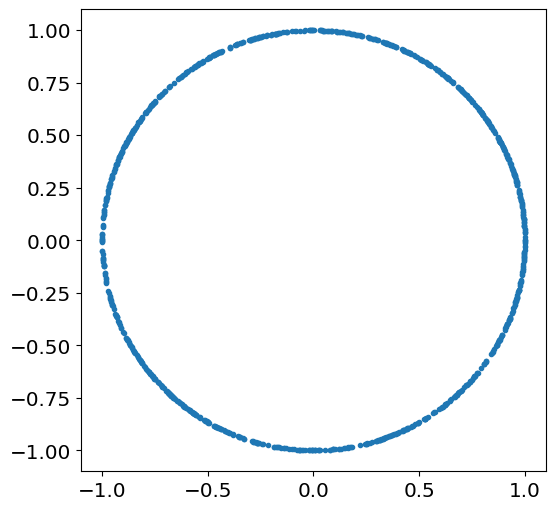

In [92]:
#Answer Block
fig,ax=plt.subplots(1,1,figsize=[6,6])
theta_rv=stats.uniform(loc=0,scale=2*np.pi)

#1.2.1
Nsamples=1000
theta=theta_rv.rvs(size=Nsamples)
X=np.cos(theta)
Y=np.sin(theta)


plt.plot(X,Y,'.')

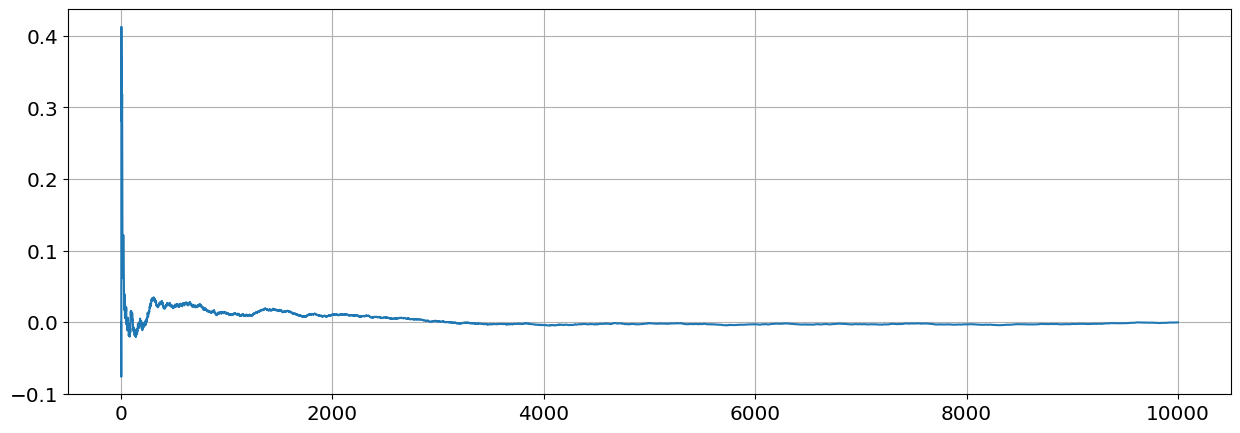

In [93]:
#1.2.2
Nmax=10000
theta=theta_rv.rvs(size=Nmax)
    
sn=np.zeros(Nmax)

for n in range(2,Nmax):
    theta_n=theta[0:n]
    X=np.cos(theta_n)
    Y=np.sin(theta_n)
    Xn=np.sum(X)/n
    Yn=np.sum(Y)/n
    sn[n]=1/(n-1)*np.sum((X-Xn)*(Y-Yn))

plt.plot(sn)
plt.grid()

# Question 1.3 

Now consider two *independent* random variables: 

$$ R\sim U[0,1]$$

$$ \theta \sim U[0,2\pi]$$ 

With 

$$ X=R\cos (\theta)$$

$$ Y=R\sin (\theta)$$

- Prove analytically that $Cov(X,Y)=0$
- plot $x_j$ vs $y_j$ for $N=1000$ draws of $X$ and $Y$.
- Plot the sample covariance for $n$ going from $n=2$ to $n=10,000$ to convince yourself numerically that the covariance is zero. 

***Answer***
$$E\left[XY\right]=\int_{0}^{1}xyp(x,y)dxdy=\int_{0}^{1}\int_{0}^{2\pi}R\cos\left(\theta\right)\sin\left(\theta\right)p(\theta,r)drd\theta=\int_{0}^{1}R\left[\int_{0}^{2\pi}\sin\left(\theta\right)\cos\left(\theta\right)\frac{1}{2\pi}d\theta\right]p(r)dr=0$$

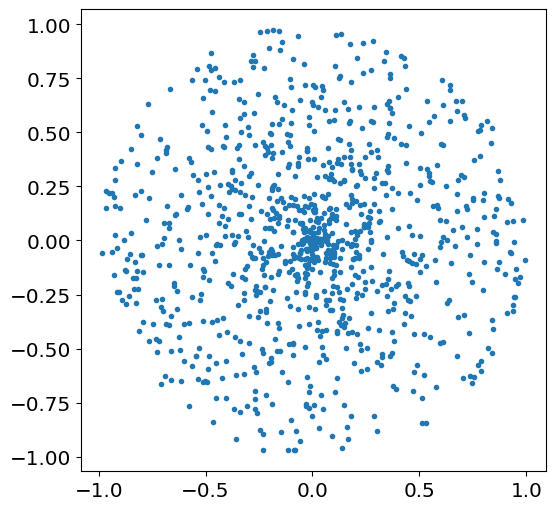

In [94]:
# Numerical Answer Block
theta_rv=stats.uniform(loc=0,scale=2*np.pi)
R_rv    =stats.uniform(loc=0,scale=1)

#1.2.1
fig,ax=plt.subplots(1,1,figsize=[6,6])
Nsamples=1000
theta=theta_rv.rvs(size=Nsamples)
R= R_rv.rvs(size=Nsamples)

X=R*np.cos(theta)
Y=R*np.sin(theta)

plt.plot(X,Y,'.')

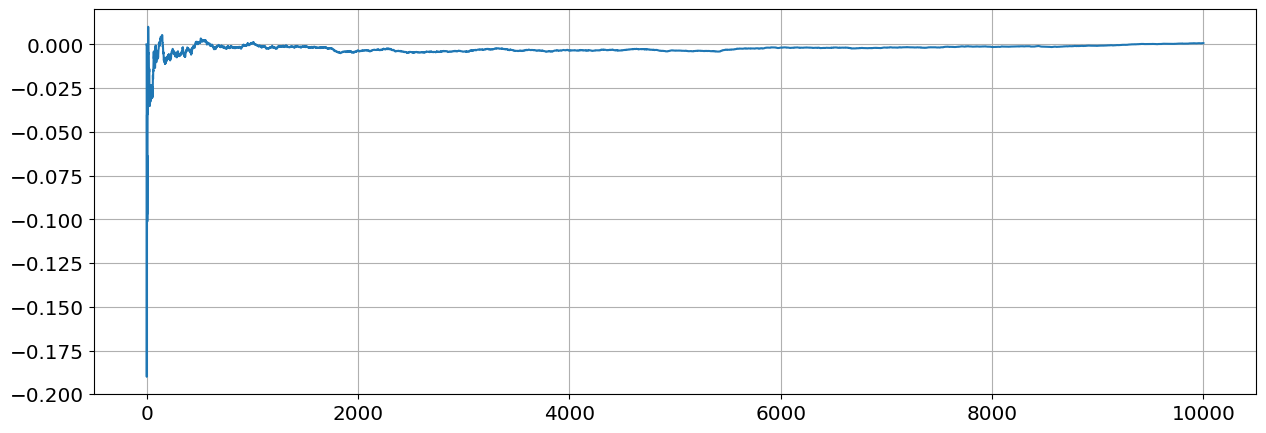

In [95]:
Nmax=10000
theta=theta_rv.rvs(size=Nmax)
R = R_rv.rvs(size=Nmax)

sn=np.zeros(Nmax)

for n in range(2,Nmax):
    theta_n=theta[0:n]
    R_n=R[0:n]
    X=R_n*np.cos(theta_n)
    Y=R_n*np.sin(theta_n)
    Xn=np.sum(X)/n
    Yn=np.sum(Y)/n
    sn[n]=1/(n-1)*np.sum((X-Xn)*(Y-Yn))

plt.plot(sn)
plt.grid()

<hr style="border:2px solid black"> </hr>

# Exercise 2: Central Limit Theorem

The central limit theorem says that the distribution of the sample mean of **any** random variable approaches a normal distribution. 

**Theorem** Let $ X_1, \cdots , X_n  $ be $n$ independent and identically distributed (i.i.d) random variables with expectation $\mu_X$ and variance $\sigma^2_X$. The distribution of the sample mean $\overline X_n=\frac{1}{n}\sum_{i=1}^n X_i$ approaches the distribution of a gaussian

$$\overline X_n \sim \mathcal N (\mu,\sigma^2/n),$$

for large $n$.
 
***Numerics*** In this exercise, you will convince yourself of this theorem numerically. Here is a recipe for how to do it (following the example in the Sampling Distributions Notebook):

- Pick your probability distribution. The Central Limit Theorem even works for discrete random variable.
- pick a sample size $n$ - i.e. the number of samples we are averaging over to compute the sample mean. 
$$ \overline X_n=\frac{1}{n}\sum_i X_n$$
- Repeatedly (i.e. $m=10,000$ times) draw $n$ samples and take their sample mean.
- Plot the histogram of the $m=10,000$ sample means.
- Compare this histogram with means with the theoretical pdf of a gaussian/normal distribution given by the Central Limit Theorem, i.e. a gaussian/normal with mean  $\mu_{clt}=\mu_X$ and variance $\sigma_{clt}^2=\sigma_X^2/n$ (standard deviation <code>scale</code>=$\sigma_{clt}=\sigma_X/\sqrt n$).

Do this exercise for four values of $n=[1,5,25,200]$, and for the distributions described below:

##  Question 2.1: Gamma distribution
Demonstrate, numerically, that the sample mean of a number of an gamma-distributed random variables is approximately normal. 

Look up the exponential distribution method for scipy.stats (Google is your friend). When you sample the gamma distribution you will need to specify a scale and shape. To plot the normal pdf given by the central limit theorem, $\mathcal N(\mu_X,\sigma_X^2/n)$, you will then need to compute the mean and variance of the exponential distribution as a function of the shape and scale parameter of the gamma. Look up that relation (Wikipedia article on gamma distributions is your friend).


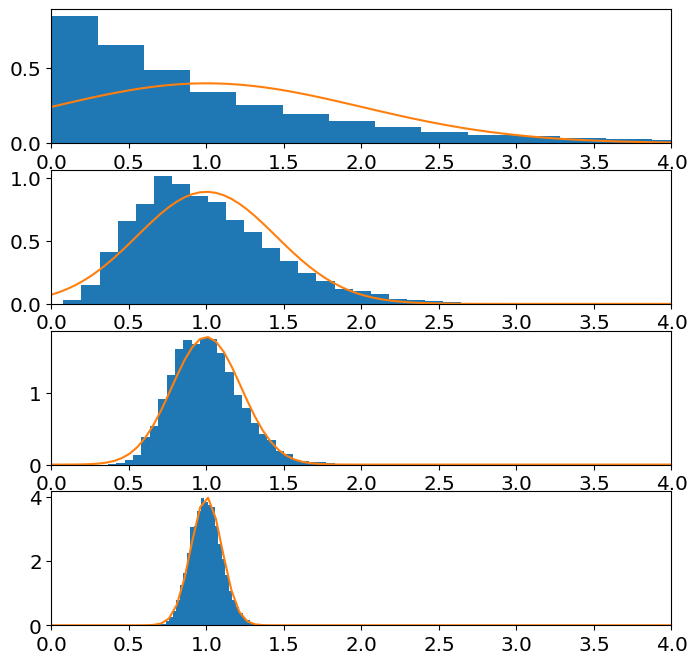

In [107]:
#Answer 
m=10000
n=[1,5,20,100]
Nbins=30

# scale for exponential distribution
scale=1;
shape=1;

# mean and variance for exponential distribution
mu_x=shape*scale
sig_x=shape*scale**2
fig,ax=plt.subplots(4,1,figsize=[8,8])

# repeat the exericse for four value n.
for j in range(4):
    # preallocate vector of sample means
    sample_mean=np.zeros([m,1])
    # compute a number of sample means
    for k in np.arange(m):
        # draw n[j] draws and average them to get the sample mean:
        X=stats.gamma.rvs(a=shape,scale=scale, size=n[j])
        sample_mean[k]=(1/n[j])*np.sum(X)
        
    
    #compute the theoretical pdf given by the CLT
    mu_clt=mu_x
    sig_clt=sig_x/np.sqrt(n[j])
    z=np.linspace(0,5,100);
    norm_pdf=stats.norm.pdf(z,loc=mu_clt,scale=sig_clt);

    ax[j].hist(sample_mean,Nbins,rwidth=1,density=True)
    ax[j].plot(z,norm_pdf);
    ax[j].set_xlim(left=0,right=4)


##  Question 2.2: Fair Dice (Discrete Uniform)

Demonstrate, numerically, that the sample mean of a **fair dice** is approximately normal (i.e. when you add $n$ rolls). You will need to look up or calculate the mean and variance for a fair dice. 



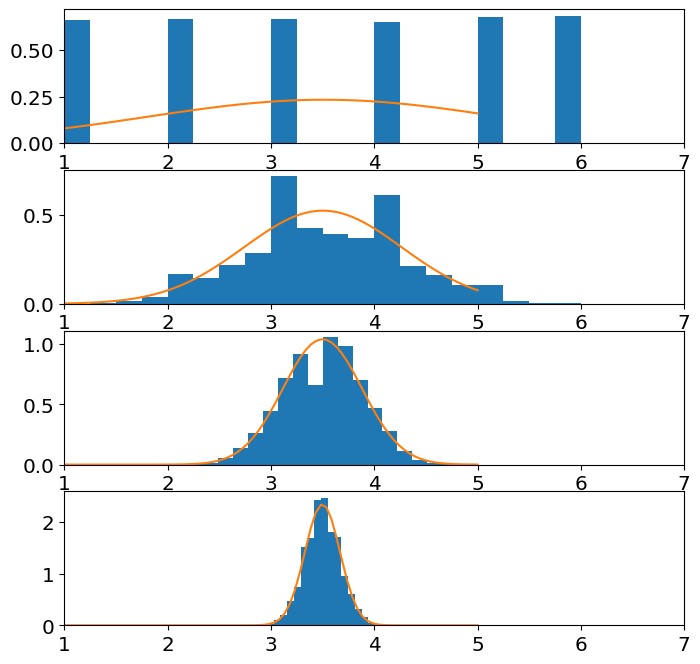

In [104]:
#Answer 
m=10000
n=[1,5,20,100]
Nbins=20

mu_x=3.5
sig_x=np.sqrt(35/12)

fig,ax=plt.subplots(4,1,figsize=[8,8])

for j in range(4):
    # preallocate vector of sample means
    sample_mean=np.zeros([m,1])
    for k in np.arange(m):
        X_norm=stats.randint.rvs(low=1,high=7,size=n[j])
        sample_mean[k]=(1/n[j])*np.sum(X_norm)
    # compute a number nsamples of sample means
    # for each sample, draw sample_size draws and average them to get the sample mean:
   
    z=np.linspace(0,5,100);
    loc,scale=stats.norm.fit(sample_mean)
    norm_pdf=stats.norm.pdf(z,loc=loc,scale=scale)

    ax[j].hist(sample_mean,Nbins,rwidth=1,density=True)
    ax[j].plot(z,norm_pdf);
    ax[j].set_xlim(left=1,right=7)

##  Question 2.3: Coin Flip (Bernoulli)
Demonstrate, numerically, that the sample mean of a **fair coin** (i.e. Bernoulli with $p=0.5$) is approximately normal. (Note that $n=200$ is note quite enought to make the sample mean normal for the Bernoulli, but you should still see the tendency towards normality. 

You will need to look up or calculate the mean and variance for a fair dice.

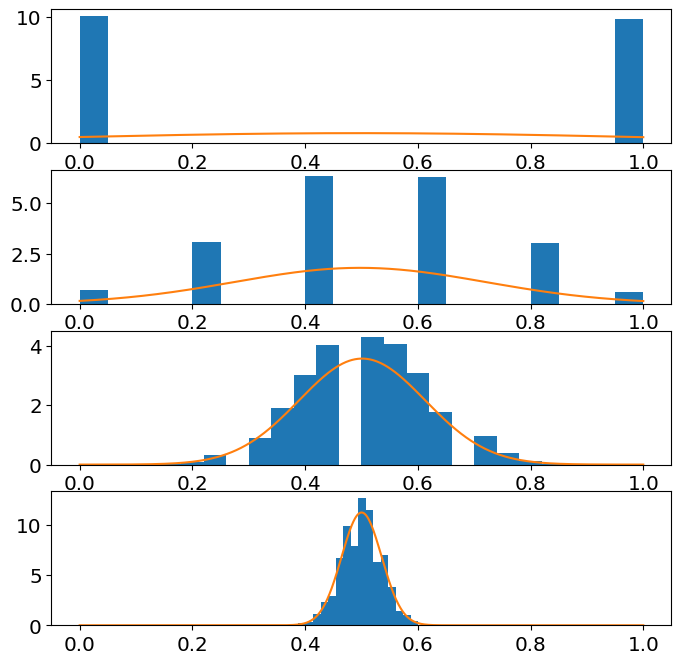

In [101]:
# Answer
#Answer 
m=10000
n=[1,5,20,200]
Nbins=20
  
mu_x=0.5
sig_x=0.5**2

fig,ax=plt.subplots(4,1,figsize=[8,8])

for j in range(4):
    # preallocate vector of sample means
    sample_mean=np.zeros([m,1])
    for k in np.arange(m):
        X_norm=stats.bernoulli.rvs(p=0.5,size=n[j])
        sample_mean[k]=(1/n[j])*np.sum(X_norm)
    # compute a number nsamples of sample means
    # for each sample, draw sample_size draws and average them to get the sample mean:
   
    z=np.linspace(0,1,1000);
    loc,scale=stats.norm.fit(sample_mean)
    norm_pdf=stats.norm.pdf(z,loc=loc,scale=scale)

    ax[j].hist(sample_mean,Nbins,rwidth=1,density=True)
    ax[j].plot(z,norm_pdf);
    #ax[j].set_xlim(left=0.4,right=0.6)

<hr style="border:2px solid black"> </hr>

# Exercise 3: Generalized Extreme Value distribution and Return Times

Harvey Return Times via GEV

In this exercise you will estimate the return times for Hurricane Harvey using a Generalized Extreme Value (GEV) distribution
https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution

The Extreme Value Theorem says if the distribution of block maxima of any distribution converges, than it converges to a GEV distribution. (See Sampling Statistics Notebook). 

In [108]:
# read data and take a cursory look
df=pd.read_csv('https://raw.githubusercontent.com/cdds-uiuc/simles-book/main/content/Module02/data/Beaumont_precip.csv')
df.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP
0,USC00410613,"BEAUMONT RESRCH CTR, TX US",1947-09-01,NaN,NaN,NaN
1,USC00410613,"BEAUMONT RESRCH CTR, TX US",1947-09-02,NaN,NaN,NaN
2,USC00410613,"BEAUMONT RESRCH CTR, TX US",1947-09-03,NaN,NaN,NaN
3,USC00410613,"BEAUMONT RESRCH CTR, TX US",1947-09-04,NaN,NaN,NaN
4,USC00410613,"BEAUMONT RESRCH CTR, TX US",1947-09-05,NaN,NaN,NaN


## Block Maxima (annual maxima)
Let's take the block maxima of precipitation for annual blocks. I.e., for each year, we will only keep the maximum value of daily precipitation that year

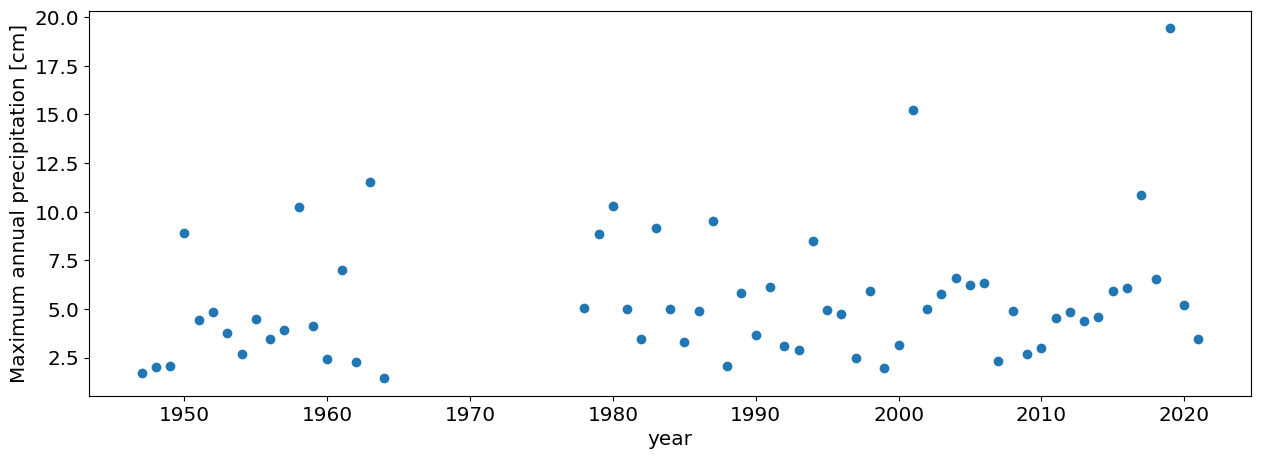

In [109]:
# Block Maxima
#Convert the Date column to a pandas date object
df.DATE = pd.to_datetime(df.DATE, format='%Y-%m-%d')

#Compute annual maxima
df_max=df.groupby(df.DATE.dt.year).max()

#plot annual maxima
plt.plot(df_max.PRCP,'o')
plt.xlabel('year')
plt.ylabel('Maximum annual precipitation [cm]');


The Extreme Value theorem says that the distribution of these annual maxima should be distributed according to a GEV

## Question 3.1: Fit using alll the data
- Using all the data, fit a GEV distribution(<code>stats.genextreme.fit</code>) to the distribution of annual maxima (<code>df_max.PRCP</code>). 
- What is the return time for the amount of precipitation that. 
- plot the return times as a function of precipitation amount.
- plot the return time for Hurricane Harvey on this graph

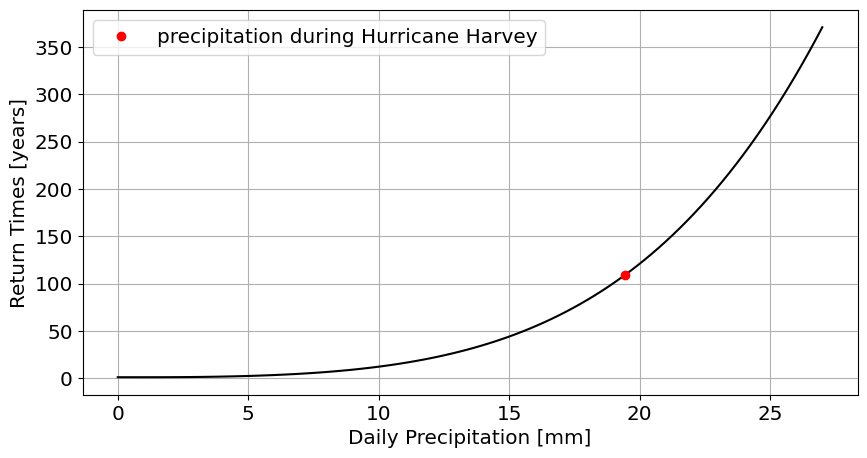

In [110]:
#Answer 
x=np.linspace(0,27,100)

#fit a GEVE
c,loc,scale=stats.genextreme.fit(df_max.PRCP)


#return time for Harvey
return_time_for_max=1/(1-stats.genextreme.cdf(df_max.PRCP.max(),c,loc=loc,scale=scale))

#return times
cdf=stats.genextreme.cdf(x,c,loc=loc,scale=scale)
return_times=1/(1-cdf)

#plot
figure,ax=plt.subplots(1,figsize=[10,5])
plt.plot(x,return_times,'k')
plt.plot(df_max.PRCP.max(),return_time_for_max,'ro',label='precipitation during Hurricane Harvey');

plt.xlabel('Daily Precipitation [mm]')
plt.ylabel('Return Times [years]')
plt.grid()
plt.legend()

# Question 3.2 Fit using pre-Harvey data
Hindsight is 20/20. But what would people have estimated the probabiltiy of a Harvey-sized rain even would have been *before* seein Harvey? 
Repeat the exercise using onyl pre-Harvey data. 

- Using only data pre-Harvey, fit a GEV distribution(<code>stats.genextreme.fit</code>) to the distribution of annual maxima (<code>df_max.PRCP</code>). 
- What is the return time for the amount of precipitation that. "
- plot the return times as a function of precipitation amount.
- plot the return time for Hurricane Harvey on this graph

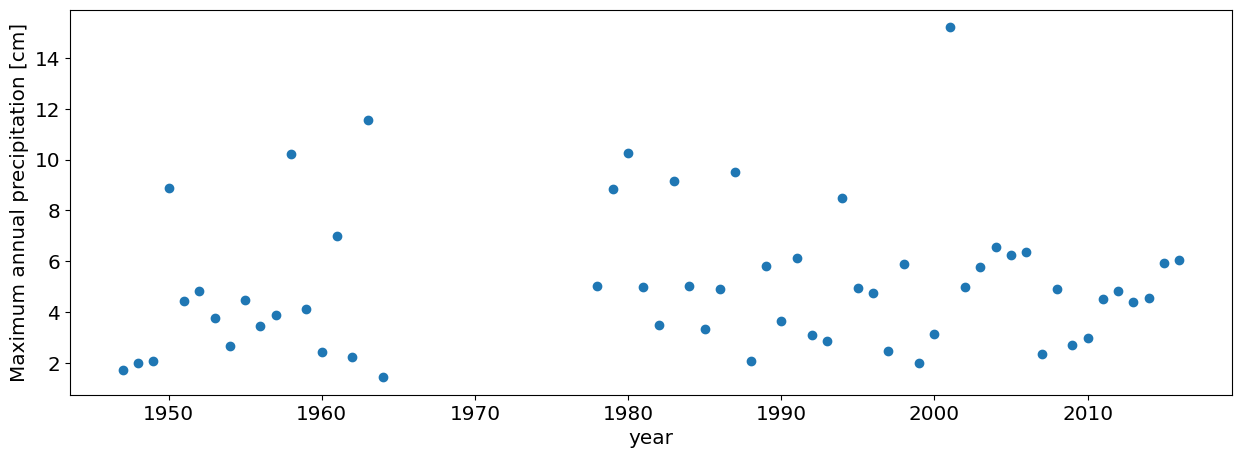

In [111]:
#this is how you only choose the data pre-Harvey
df_max_preHarvey=df_max[df_max.DATE.dt.year<2017]

#plot annual maxima
plt.plot(df_max_preHarvey.PRCP,'o')
plt.xlabel('year')
plt.ylabel('Maximum annual precipitation [cm]');


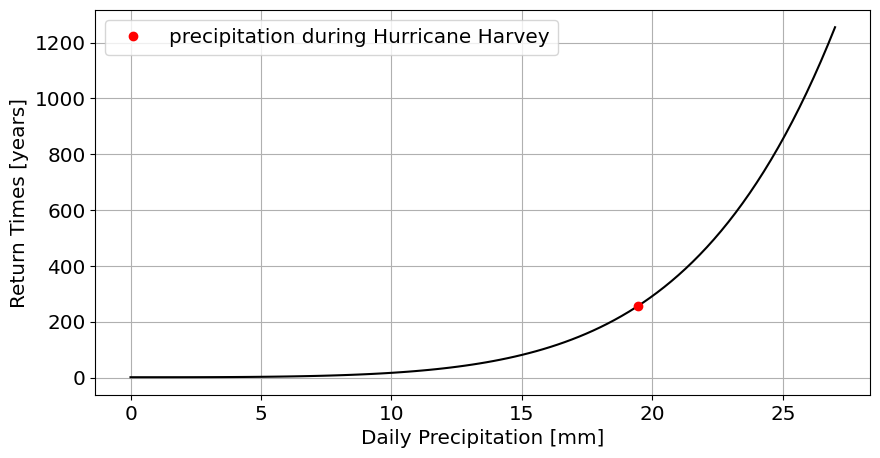

In [112]:
#Answer 
x=np.linspace(0,27,100)

#fit a GEVE
c,loc,scale=stats.genextreme.fit(df_max_preHarvey.PRCP)


#return time for Harvey
return_time_for_max=1/(1-stats.genextreme.cdf(df_max.PRCP.max(),c,loc=loc,scale=scale))

#return times
cdf=stats.genextreme.cdf(x,c,loc=loc,scale=scale)
return_times=1/(1-cdf)

#plot
figure,ax=plt.subplots(1,figsize=[10,5])
plt.plot(x,return_times,'k')
plt.plot(df_max.PRCP.max(),return_time_for_max,'ro',label='precipitation during Hurricane Harvey');

plt.xlabel('Daily Precipitation [mm]')
plt.ylabel('Return Times [years]')
plt.grid()
plt.legend()

# Question 3.3: Port Arthur (using all the data)
Repeat the analysis in Question 3.1 for Port Arthur data (another station near Houston that got record floods during Hurricane Harvey


Text(0.5, 1.0, 'Port Arthur')

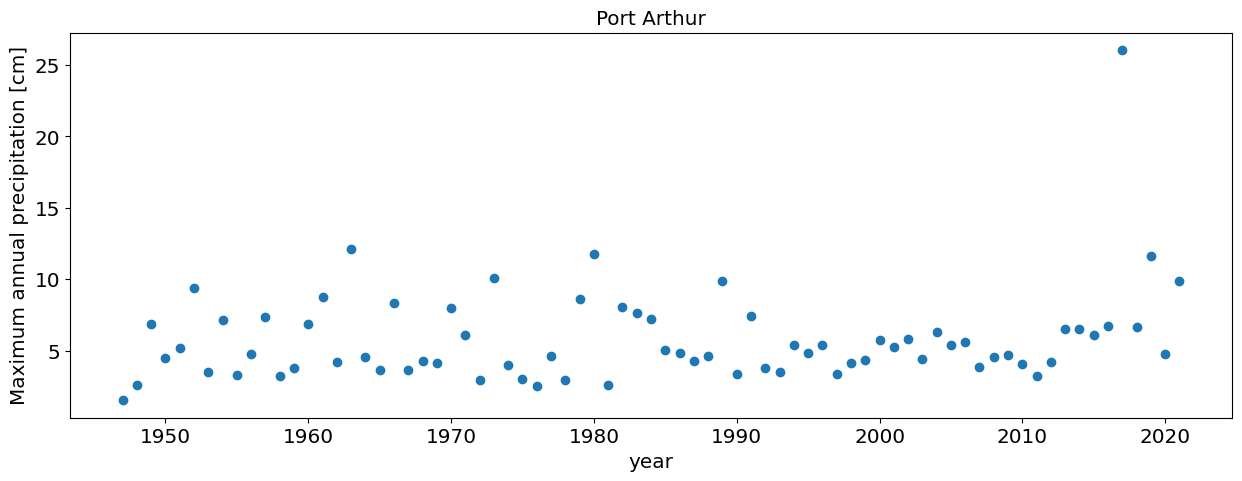

In [113]:
df=pd.read_csv('https://raw.githubusercontent.com/cdds-uiuc/simles-book/main/content/Module02/data/PortArthur_precip.csv')

# Block Maxima
#Convert the Date column to a pandas date object
df.DATE = pd.to_datetime(df.DATE, format='%Y-%m-%d')

#Compute annual maxima
df_max=df.groupby(df.DATE.dt.year).max()

#plot annual maxima
plt.plot(df_max.PRCP,'o')
plt.xlabel('year')

plt.ylabel('Maximum annual precipitation [cm]');
plt.title('Port Arthur')

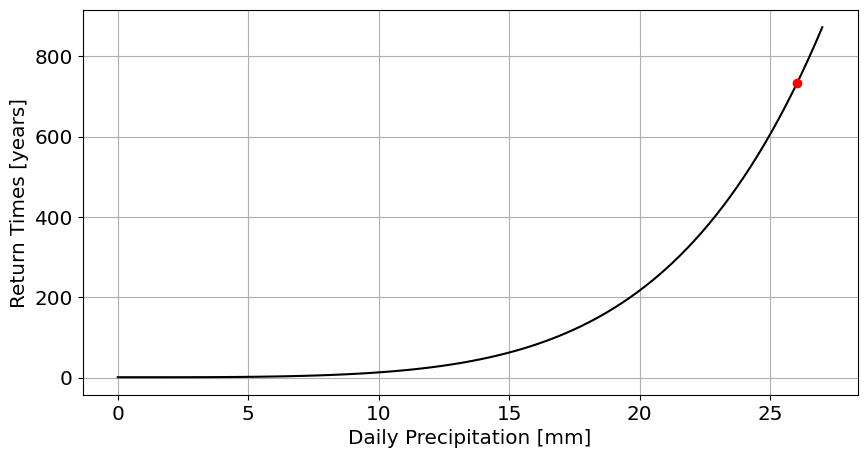

In [85]:
#Block for Answer 
x=np.linspace(0,27,100)

#fit a GEVE
c,loc,scale=stats.genextreme.fit(df_max.PRCP)


#return time for Harvey
return_time_for_max=1/(1-stats.genextreme.cdf(df_max.PRCP.max(),c,loc=loc,scale=scale))

#return times
cdf=stats.genextreme.cdf(x,c,loc=loc,scale=scale)
return_times=1/(1-cdf)

#plot
figure,ax=plt.subplots(1,figsize=[10,5])
plt.plot(x,return_times,'k')
plt.plot(df_max.PRCP.max(),return_time_for_max,'ro',label='precipitation during Hurricane Harvey');

plt.xlabel('Daily Precipitation [mm]')
plt.ylabel('Return Times [years]')
plt.grid()

# Question 3.4: Port Arthur (using pre-Harvey data)
Repeat the analysis in Question 3.2 for Port Arthur data (another station near Houston that got record floods during Hurricane Harvey). 


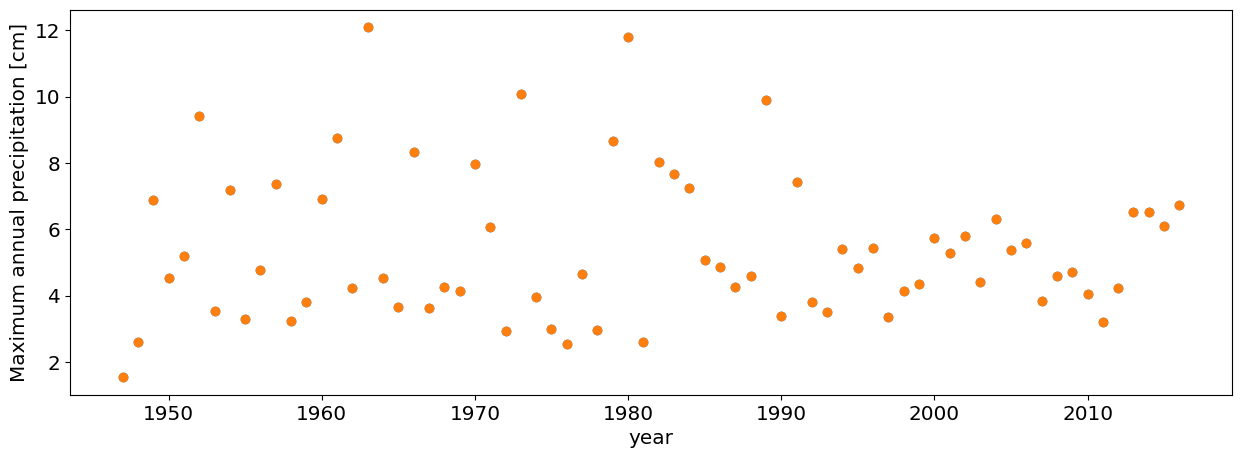

In [87]:
#this is how you only choose the data pre-Harvey
df_max_preHarvey=df_max[df_max.DATE.dt.year<2017]

#plot annual maxima
plt.plot(df_max_preHarvey.PRCP,'o')
plt.xlabel('year')
plt.ylabel('Maximum annual precipitation [cm]');

df=pd.read_csv('https://raw.githubusercontent.com/cdds-uiuc/simles-book/main/content/Module02/data/PortArthur_precip.csv')

# Block Maxima
#Convert the Date column to a pandas date object
df.DATE = pd.to_datetime(df.DATE, format='%Y-%m-%d')

#Compute annual maxima
df_max=df.groupby(df.DATE.dt.year).max()
df_max_preHarvey=df_max[df_max.DATE.dt.year<2017]

#plot annual maxima
plt.plot(df_max_preHarvey.PRCP,'o')
plt.xlabel('year')
plt.ylabel('Maximum annual precipitation [cm]');


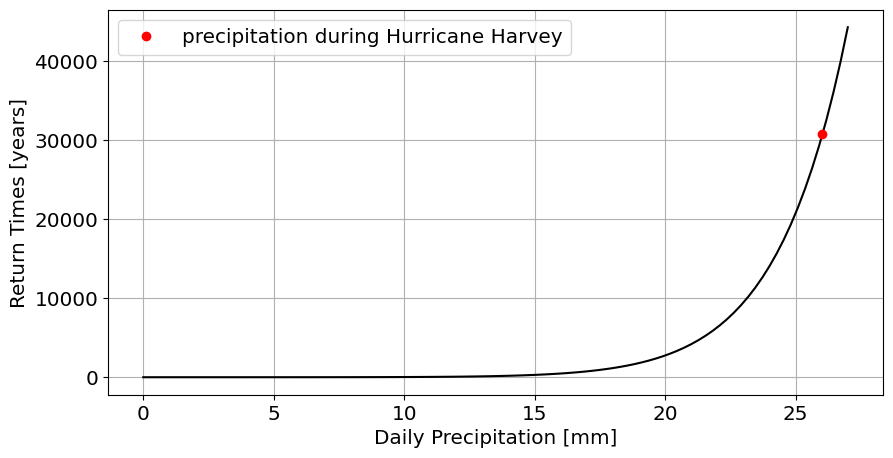

In [88]:
#Answer 
x=np.linspace(0,27,100)

#fit a GEVE
c,loc,scale=stats.genextreme.fit(df_max_preHarvey.PRCP)


#return time for Harvey
return_time_for_max=1/(1-stats.genextreme.cdf(df_max.PRCP.max(),c,loc=loc,scale=scale))

#return times
cdf=stats.genextreme.cdf(x,c,loc=loc,scale=scale)
return_times=1/(1-cdf)

#plot
figure,ax=plt.subplots(1,figsize=[10,5])
plt.plot(x,return_times,'k')
plt.plot(df_max.PRCP.max(),return_time_for_max,'ro',label='precipitation during Hurricane Harvey');

plt.xlabel('Daily Precipitation [mm]')
plt.ylabel('Return Times [years]')
plt.grid()
plt.legend()